In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

# check for required file
FILE_PATH = '../data/NYC_Census_Data_Merged_Cleaned.csv'

file_path = Path(FILE_PATH)

# Check if the file exists
if file_path.exists():
    print(f"File found: {file_path}")
else:
    print(f"File not found: {file_path}. Please ensure the file is downloaded correctly.")

    # Load the dataset
initial_df = pd.read_csv(FILE_PATH)

File found: ../data/NYC_Census_Data_Merged_Cleaned.csv


In [2]:
initial_df.head()

,Borough,TotalPop,Men,Women,Citizen,latitude,longitude
0,Bronx,7703,7133,570,6476,40.787538,-73.887437
1,Bronx,7703,7133,570,6476,40.787538,-73.884271
2,Bronx,7703,7133,570,6476,40.787538,-73.881106
3,Bronx,7703,7133,570,6476,40.787538,-73.877940
4,Bronx,7703,7133,570,6476,40.787538,-73.874774


In [3]:
# Count the number of NaNs in each column
nan_counts = initial_df.isna().sum()

# Display the count of NaNs per column
nan_counts

Borough      0
TotalPop     0
Men          0
Women        0
Citizen      0
latitude     0
longitude    0
dtype: int64

In [4]:
initial_df.describe()

,TotalPop,Men,Women,Citizen,latitude,longitude
count,18052.000000,18052.000000,18052.000000,18052.000000,18052.000000,18052.000000
mean,2911.090682,1411.314591,1499.776091,1944.217040,40.663946,-73.938182
std,2963.959357,1433.417834,1570.619628,2086.253957,0.108225,0.130484
min,0.000000,0.000000,0.000000,0.000000,40.480000,-74.257839
25%,0.000000,0.000000,0.000000,0.000000,40.572714,-74.020402
50%,2627.000000,1318.000000,1346.000000,1688.000000,40.645075,-73.915930
75%,4586.000000,2214.000000,2382.000000,2970.000000,40.746834,-73.836784
max,28926.000000,13460.000000,15466.000000,22905.000000,40.916432,-73.700653


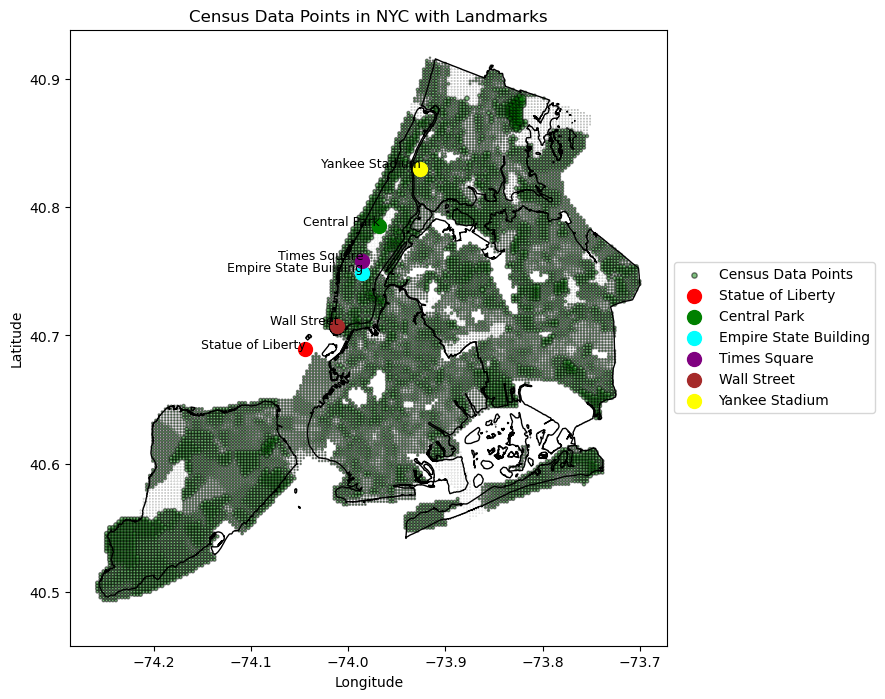

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile containing the borough boundaries
boroughs = gpd.read_file('../mappings/boundaries/boundaries.shp')

# Ensure the coordinate reference system (CRS) matches between your shapefile and your data
boroughs = boroughs.to_crs(epsg=4326)  # EPSG:4326 is commonly used for lat/lon data


# Load the landmarks data if you want to overlay it
landmarks_df = pd.read_csv('../mappings/nyc_landmarks.csv')

# Your existing data for the census
latitudes = initial_df['latitude']
longitudes = initial_df['longitude']
populations = initial_df['TotalPop']  # Adjust this to the column you want to scale by

# Create the scatter plot for census data with scaled marker sizes
plt.figure(figsize=(12, 8))
plt.scatter(longitudes, latitudes, c='green', alpha=0.5, edgecolor='k', label='Census Data Points', s=populations / 1000)  # Adjust the scaling factor

# Plot the borough boundaries
boroughs.plot(ax=plt.gca(), edgecolor='black', facecolor='none', linewidth=1)

# Plot each landmark with its respective color
for index, row in landmarks_df.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], c=row['Color'], label=row['Place'], s=100)
    plt.text(row['Longitude'] + 0.001, row['Latitude'] + 0.001, row['Place'], fontsize=9, ha='right')

# Adding titles and labels
plt.title('Census Data Points in NYC with Landmarks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


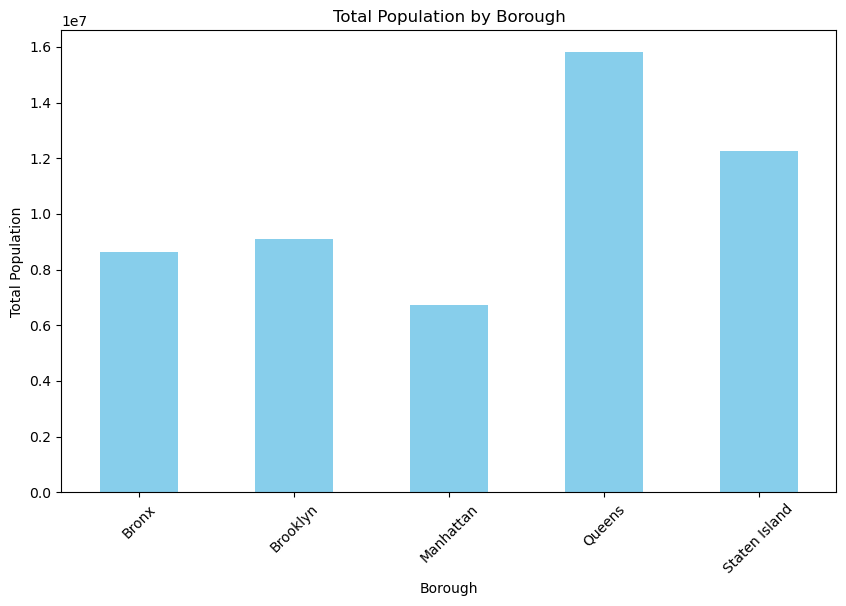

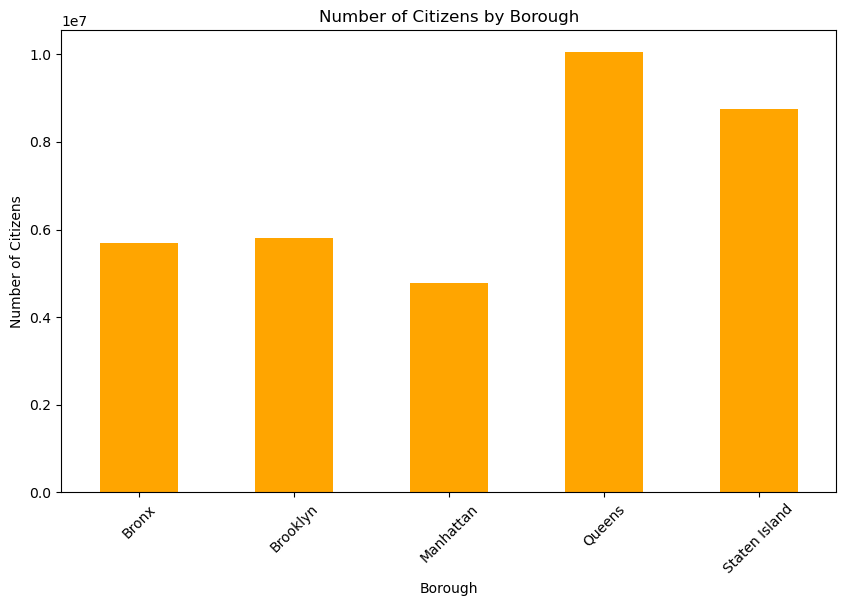

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Borough and sum the relevant columns
borough_summary = initial_df.groupby('Borough').sum()

# Plot Total Population by Borough
plt.figure(figsize=(10, 6))
borough_summary['TotalPop'].plot(kind='bar', color='skyblue')
plt.title('Total Population by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.show()

# Plot Number of Men by Borough
plt.figure(figsize=(10, 6))
borough_summary['Citizen'].plot(kind='bar', color='orange')
plt.title('Number of Citizens by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Citizens')
plt.xticks(rotation=45)
plt.show()


# Add more bar charts for other metrics as needed
